# <font color='056938'> **Load modules** </font>

We will load into this notebook some modules with functions that will help you in the development of heuristics and metaheuristics for the solution of travelling salesman problemas

The module `random_generators.py` include the functions to deal with generating random numbers. The ultimate function of this module is to generate a random permutation (solution) of the tsp problem
* Random tour generation: `rand_permutation`

The module `tsp_tools` provides different functions to help from the data reading to the solution ploting
* Data reading: `read_data(filepath)`
> `filepath`: the route to the file with the instance's data
* Distance calculation: `calculate_distances`
* Data display: `print_TSPdata()
* Solution evaluation: `tsp_distance`
* Tour display: `plot_tsp_route()`
* Plot the search trayectory `plot_trace(trace)`

In [1]:
import random_generators as ran_gen
import tsp_tools as tools

# <font color='056938'> **Instance generation** </font>

## <font color='8EC044'> **Data reading** </font>

We will use the clasical test instances stored in  [TSPlib](http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/), the format of these instances include a heading with the following information:

>NAME: berlin52

>TYPE: TSP

>COMMENT: 52 locations in Berlin (Groetschel)

>DIMENSION: 52

>EDGE_WEIGHT_TYPE: EUC_2D

>NODE_COORD_SECTION

Then, n lines with the coordinates of the cities in the following format (cityID, Coordinate X, Coordinate Y):

**id cX cY**

Knowing this structure we are going to read three files

* `prueba10.tsp`
* `berlin52.tsp`
* `a280.tsp`




First we load the datafile to the colab environment

Then we read the data file

In [2]:
data = tools.read_data("prueba10.tsp")             #Read the data
data

[[565.0, 575.0],
 [25.0, 185.0],
 [345.0, 750.0],
 [945.0, 685.0],
 [845.0, 655.0],
 [880.0, 660.0],
 [25.0, 230.0],
 [525.0, 1000.0],
 [580.0, 1175.0],
 [650.0, 1130.0]]

We get the size of the instance. That is, the number of nodes `n`

In [3]:
n = len(data)
n

10

## <font color='8EC044'> **Distance calculation** </font>

We are going to use the $\tt{scipy.spatial}$ package to calculate the distances trhough the function `calculate_distances()`



In [4]:
distances=tools.calculate_distances(data)
distances

array([[   0.        ,  666.10809934,  281.11385594,  395.6008089 ,
         291.20439557,  326.26676202,  640.8002809 ,  426.87820277,
         600.18747071,  561.47128155],
       [ 666.10809934,    0.        ,  649.32657423, 1047.09120902,
         945.14549145,  978.08486339,   45.        ,  956.15113868,
        1134.95594628, 1132.98278892],
       [ 281.11385594,  649.32657423,    0.        ,  603.51056329,
         508.9449872 ,  542.51728083,  610.5735009 ,  308.05843601,
         485.64390246,  487.26276279],
       [ 395.6008089 , 1047.09120902,  603.51056329,    0.        ,
         104.40306509,   69.64194139, 1026.36494484,  525.        ,
         611.00327331,  533.90073984],
       [ 291.20439557,  945.14549145,  508.9449872 ,  104.40306509,
           0.        ,   35.35533906,  923.59352531,  470.55817919,
         583.6308765 ,  513.4685969 ],
       [ 326.26676202,  978.08486339,  542.51728083,   69.64194139,
          35.35533906,    0.        ,  957.0397066 ,  491

## <font color='056938'> **1.1 Initial solution generation** </font>

As usual, we will use the Traveling Salesman Problem (TSP) as a toy problem for illustrate the functionality of these methods. The code in the modules we load makes use of the code from [Taillard](http://mistic.heig-vd.ch/taillard/articles.dir/taillard.html) (2023), which is, in turn, built upon [L'Ecuyer's](https://www.iro.umontreal.ca/~lecuyer/) random number generator for randomness.

It is used to generate a random solution. That is an inital random permutation:

In [5]:
sol=ran_gen.rand_permutation(n)
sol

[4, 2, 9, 1, 7, 5, 0, 6, 8, 3]

##<font color='056938'> **1.1.1. Solution evaluation** </font>

### <font color='8EC044'> **Objective function calculation** </font>

Now we define use function `tsp_distance()` to evaluate the objective function of a given permutation

For the case of the solution we previuosly generated it will be:

In [6]:
obj_fn = tools.tsp_distance(distances,sol)
print("Distance of the permutation --> " + str(obj_fn))

Distance of the permutation --> 6355.292985706332


## <font color='056938'> **1.2 Ant Colony Optimization** </font>

Ant Colony Optimization (ACO) is a nature-inspired optimization algorithm that is based on the foraging behavior of ants. It is commonly used to find solutions to complex combinatorial optimization problems. In ACO, a population of artificial ants iteratively builds solutions to a problem by depositing and following pheromone trails. Ants communicate through these pheromone trails, reinforcing paths that lead to good solutions and fading away those that lead to suboptimal ones. Over time, the algorithm converges towards an optimal or near-optimal solution.

### <font color='8EC044'> **1.2.1 How to deﬁne the trails of an artiﬁcial ant colony for TSP?** </font>



The following function will help us to initialize a pheromone trails matris:

In [7]:
def init_trail(initial_value, trail):
  n = len(trail[0])
  for i in range(n):
    for j in range(n):
      trail[i][j] = initial_value

  for i in range(n):
    trail[i][i] = 0

  return trail

Let's define a pheromone matrix for the instance *prueba10.tsp*. It will be a matrix $10 \times 10$:

In [8]:
n = 10
trail = [[-1] * n for _ in range(n)]
trail = init_trail(0.5, trail)
trail

[[0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
 [0.5, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
 [0.5, 0.5, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
 [0.5, 0.5, 0.5, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
 [0.5, 0.5, 0.5, 0.5, 0, 0.5, 0.5, 0.5, 0.5, 0.5],
 [0.5, 0.5, 0.5, 0.5, 0.5, 0, 0.5, 0.5, 0.5, 0.5],
 [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0, 0.5, 0.5, 0.5],
 [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0, 0.5, 0.5],
 [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0, 0.5],
 [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0]]

At the begining all trails gets the same value, because we do not have posterior information about the problem.

The pheromone trails must updated after each iteration. This process is developed in two steps:

1. Evaporation: All pheromones trails are reduced by a fixed portion $ρ \in (0, 1)$:
$$\tau_{ij} := (1 - ρ) \cdot τ_{ij} ∀ i,j \in [1: n] $$
2. Intensification: All pheromone trails corresponding to the best solution $π^*$ are increased by an absolute amount $Δ > 0$:
$$\tau_{iπ^*} := τ_{i\pi^*} + \Delta  ∀ i \in [1: n] $$


Now, it is the time for you to program the `update_trails` function. This function receives the current pheromone trails matrix `trail`, the parameters $\rho$ and $\Delta$, and the permutation representing the best solution found in an iteration of the ACO algorithm.  

### <font color='8EC044'> **1.2.2 Constructive method** </font>

Now, we need to create our constructive heuristic. This function will construct a path to visit all cities in the problem, based on the probability $p_{ij}$ which is computed unsing only the pheromone trails:
$$p_{ij} := \frac{τ_{ij}}{∑_{z∈S} τ_{iz}} ∀ j \in S$$

Now, it is time to code the function to compute the probability to go from city $i$ to $j$. This function also needs the updated pheromone `trail` and the set of unvisited cities `S`:

Print best solution's trajectory

# <font color='056938'> **Fast Ant System** </font>

Several authors have pointed the disadvantages of the basic Ant Colony Optimization algorithm [(Taillard, 2022)](https://link.springer.com/chapter/10.1007/978-3-031-13714-3_8). For that reason, FANT, a simplified framework has been proposed.

Let's define the functions needed for implementing the framework and test it.

First, the constructive heuristic:

In [9]:
#Create random number geneator
# Select a random city based on the probabilities computed
import random

def generate_solution_trail(distance, tour, trail):
  n = len(tour)
  for i in range(1, n - 1):
    total =0
    for j in range(i + 1, n):
      total += trail[tour[i - 1]][tour[j]]
    target = random.uniform(0, total - 1)
    j = i
    total = trail[tour[i - 1]][tour[j]]

    while total < target:
      total += trail[tour[i - 1]][tour[j + 1]]
      j += 1
    tour[j], tour[i]= tour[i], tour[j]
  return tour, tools.tsp_distance(distance, tour)

Now we need to create a new function to update the pheromone trials:

In [14]:
def update_trail(tour, global_best, exploration, exploitation, trail):
  if tour == global_best:
    exploration += 1
    trail = init_trail(exploration, trail)
  else:
    for i in tour:
      n = len(trail[0])
      trail[tour[i]][tour[(i + 1) % n]] += exploration
      trail[global_best[i]][global_best[(i + 1) % n]] += exploitation
  return trail, exploration

Let's define the fant function:

In [12]:
from random_generators import rand_permutation
def tsp_FANT(d, exploitation, iterations):
  n = len(d[0])
  best_cost = float('inf')
  exploration =1
  trail = [[-1] * n for _ in range(n)]
  trail = init_trail(exploration, trail)
  tour = rand_permutation(n)
  trace = []
  for i in range(iterations):
    print(trail)
    # build solution
    tour, cost = generate_solution_trail(d, tour, trail)
    # improve built solution witho a local search
    #tour, cost = tsp_LK(d, tour, cost)
    print(cost)
    #tour, cost = local_search_tsp(tour, d)
    trace.append([i, cost])
    if cost < best_cost:
      best_cost = cost
      print('\t\t\t\t\tFANT {:d} {:f}'.format(i+1, cost))
      best_sol = list(tour)
      exploration =1
      # Reset exploration to lowest value
      trail = init_trail(exploration, trail)
    else:
      # pheromone trace reinforcement - increase memory
      trail, exploration = update_trail(tour, best_sol, exploration,
                                        exploitation, trail)
  return best_sol, best_cost, trace

In [21]:
#Parameters
n_iters = 20
exploitation = 0.2

# Read data
data = tools.read_data("prueba10.tsp")
n = len(data)


# Create distances and penalties matrices
distances = tools.calculate_distances(data)

best_sol, best_cost, trace = tsp_FANT(distances, exploitation, n_iters)

[[0, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 0, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 0, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 0, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 0, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 0, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 0, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 0, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 0, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 0]]
6669.990767630941
					FANT 1 6669.990768
[[0, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 0, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 0, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 0, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 0, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 0, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 0, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 0, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 0, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 0]]
6413.941755672014
					FANT 2 6413.941756
[[0, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 0, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 0, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 0, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 0, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 0, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 0, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 0, 1, 1], [1, 1, 1, 1, 1, 1

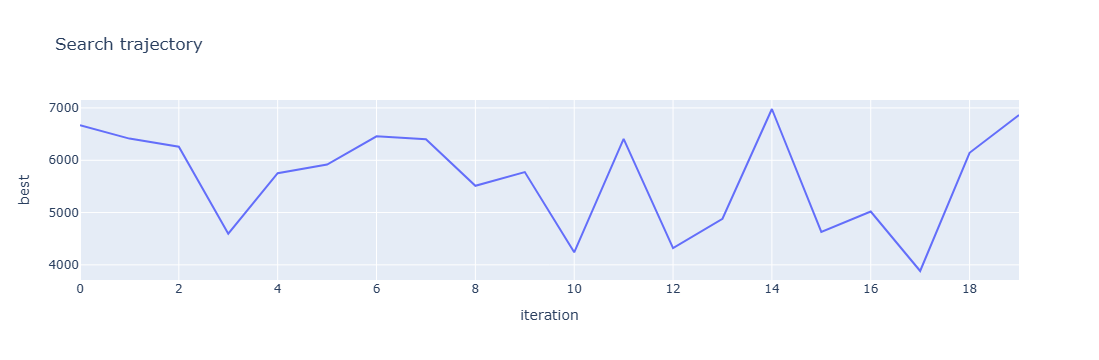

In [22]:
import pandas as pd
import plotly.express as px


def plot_trace(trace):
  df = pd.DataFrame(trace, columns=['iteration', 'best'])
  fig = px.line(df, x='iteration', y='best', title='Search trajectory')

  return fig

plot_trace(trace)

## <font color='056938'> **Excercise** </font>

 - Explore different configurations of the FANTS metaheuristic (number of iterations and explotation parameter) for another test instace 
 - Compare the results with those of a randomized **Nearest Neighboor Heuristic**




In [23]:
best_sol



[4, 9, 8, 7, 0, 5, 2, 6, 1, 3]

In [24]:
print("Costo" ,best_cost)


Costo 3882.854565688344


In [20]:
trail


[[0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
 [0.5, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
 [0.5, 0.5, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
 [0.5, 0.5, 0.5, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
 [0.5, 0.5, 0.5, 0.5, 0, 0.5, 0.5, 0.5, 0.5, 0.5],
 [0.5, 0.5, 0.5, 0.5, 0.5, 0, 0.5, 0.5, 0.5, 0.5],
 [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0, 0.5, 0.5, 0.5],
 [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0, 0.5, 0.5],
 [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0, 0.5],
 [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0]]